# Visualization of the Theoretical Lower Bound on Triplet Error

C:\Users\11387\AppData\Local\Temp\ipykernel_1988\253536301.py:89: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("Blues_r")


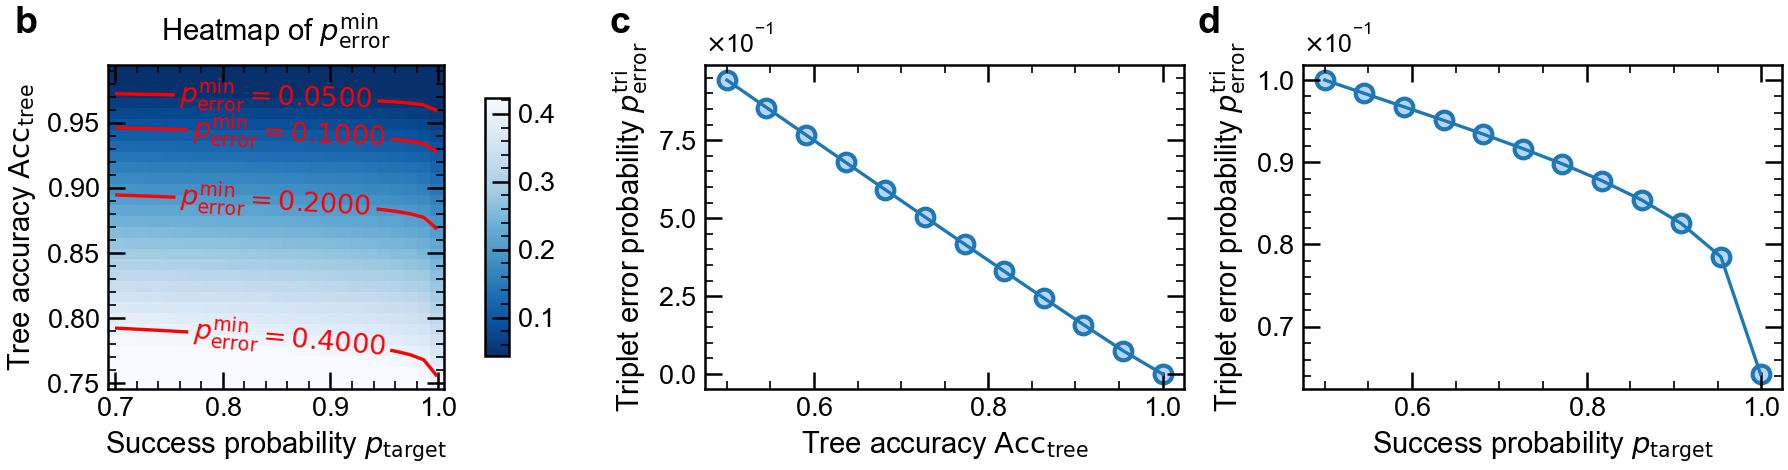

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfcinv
from matplotlib.cm import get_cmap
from plot_style import configure_journal_style
from matplotlib.ticker import ScalarFormatter

# -------------------------------------------------
# Configure global plotting style (journal quality)
# -------------------------------------------------
configure_journal_style()

# Define consistent color palette
colors = {
    'blue': '#1f77b4',
    'red': '#d62728',
}

# =============================
# Basic parameters
# =============================
# Number of cells in the lineage tree
n_cell = 10

# Total number of unordered triplets: C(n_cell, 3)
comb_nc3 = n_cell * (n_cell - 1) * (n_cell - 2) / 6

# =============================
# Lower bound on triplet error
# =============================
def p_error_tri(p_target, acc_target):
    """
    Compute the theoretical lower bound on the triplet error probability.

    Parameters
    ----------
    p_target : float or ndarray
        Target success probability (confidence level).
    acc_target : float or ndarray
        Desired tree reconstruction accuracy.

    Returns
    -------
    p_error_min : float or ndarray
        Minimum achievable triplet error probability under
        concentration-based bounds.
    """
    # Gaussian quantile associated with p_target
    z = np.sqrt(2) * erfcinv(2 * (1 - p_target))

    # Normalized deviation term (scales with number of triplets)
    term = z / np.sqrt(comb_nc3)

    # Closed-form lower bound derived from concentration inequalities
    return (1 / 16) * (-term + np.sqrt(term**2 + 32 * (1 - acc_target)))**2


# =============================
# Figure layout
# =============================
# Create a compact multi-panel figure
fig = plt.figure(figsize=(7.2, 1.4), dpi=300)

# GridSpec:
# (b) heatmap + colorbar | (c) line plot | (d) line plot
gs = fig.add_gridspec(
    1, 4,
    width_ratios=[0.7, 0.05, 1, 1],
    wspace=0.36
)

# =============================
# (b) Heatmap: p_error_min
# =============================
ax_hm = fig.add_subplot(gs[0, 0])
cax_hm = fig.add_subplot(gs[0, 1])

# Parameter ranges
p_target_vals = np.linspace(0.7, 0.999, 25)
acc_vals = np.linspace(0.75, 0.99, 30)

# Create 2D parameter grid
P, ACC = np.meshgrid(p_target_vals, acc_vals)

# Evaluate lower bound on the grid
p_err_grid = p_error_tri(P, ACC)

# Use a low-contrast blue colormap to avoid visual saturation
cmap = get_cmap("Blues_r")

# Robust color scaling using percentiles
vmin = np.percentile(p_err_grid, 90)
vmax = np.percentile(p_err_grid, 10)

# Render heatmap
mesh = ax_hm.pcolormesh(
    P, ACC, p_err_grid,
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    shading="auto"
)

# Overlay contour lines for selected error levels
V = [0.05, 0.1, 0.2, 0.4]
CS = ax_hm.contour(
    P, ACC, p_err_grid,
    levels=V,
    colors="r",
    linewidths=0.8
)

# Label contour lines with explicit values
ax_hm.clabel(
    CS,
    inline=True,
    fontsize=6.5,
    fmt=lambda v: rf"$p_{{\mathrm{{error}}}}^{{\mathrm{{min}}}}={v:.4f}$"
)

# Vertical colorbar
cbar = fig.colorbar(mesh, cax=cax_hm, orientation="vertical")
cax_hm.yaxis.set_ticks_position("right")

# Adjust colorbar height and center it vertically
pos = cax_hm.get_position()
new_h = pos.height * 0.8
new_y = pos.y0 + (pos.height - new_h) / 2

cax_hm.set_position([
    pos.x0 - 0.036,  # move closer to heatmap
    new_y,
    pos.width,
    new_h
])

# Axis labels and title
ax_hm.set_xlabel(r"Success probability $p_{\mathrm{target}}$", fontsize=7)
ax_hm.set_ylabel(r"Tree accuracy $\mathrm{Acc}_{\mathrm{tree}}$", fontsize=7)
ax_hm.set_title(r"Heatmap of $p_{\mathrm{error}}^{\mathrm{min}}$", fontsize=7)

# Panel label
ax_hm.text(-0.28, 1.1, "b", transform=ax_hm.transAxes,
           fontsize=9, fontweight="bold")


# =============================
# (c) p_error vs tree accuracy
# =============================
axC = fig.add_subplot(gs[0, 2])

# Fix success probability
p_target_fixed = 0.9

# Vary target accuracy
accuracy_values = np.linspace(0.5, 1.0, 12)
p_error_values_acc = p_error_tri(p_target_fixed, accuracy_values)

# Plot curve and markers
axC.plot(accuracy_values, p_error_values_acc,
         color=colors["blue"], lw=0.8)
axC.scatter(
    accuracy_values, p_error_values_acc,
    s=18,
    facecolors=(0.3, 0.6, 1.0, 0.4),
    edgecolors=colors["blue"]
)

axC.set_xlabel(r"Tree accuracy $\mathrm{Acc}_{\mathrm{tree}}$", fontsize=7)
axC.set_ylabel(r"Triplet error probability $p_{\mathrm{error}}^{\mathrm{tri}}$", fontsize=7)

axC.text(-0.2, 1.1, "c", transform=axC.transAxes,
         fontsize=9, fontweight="bold")


# =============================
# (d) p_error vs success probability
# =============================
axD = fig.add_subplot(gs[0, 3])

# Fix target accuracy
acc_target_fixed = 0.95

# Vary success probability
p_target_values = np.linspace(0.5, 0.999, 12)
p_error_values_pt = p_error_tri(p_target_values, acc_target_fixed)

axD.plot(p_target_values, p_error_values_pt,
         color=colors["blue"], lw=0.8)
axD.scatter(
    p_target_values, p_error_values_pt,
    s=18,
    facecolors=(0.3, 0.6, 1.0, 0.4),
    edgecolors=colors["blue"]
)

axD.set_xlabel(r"Success probability $p_{\mathrm{target}}$", fontsize=7)
axD.set_ylabel(r"Triplet error probability $p_{\mathrm{error}}^{\mathrm{tri}}$", fontsize=7)

axD.text(-0.22, 1.1, "d", transform=axD.transAxes,
         fontsize=9, fontweight="bold")


# =============================
# Scientific notation formatting
# =============================
for ax in [axC, axD]:
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0, 0))
    ax.yaxis.set_major_formatter(formatter)
    ax.yaxis.get_offset_text().set_size(6)

# =============================
# Save figure
# =============================
plt.savefig("Fig_triplet_error_1x3.pdf", dpi=300, bbox_inches="tight")
plt.show()


# Scaling of the Required Number of Mutation Sites

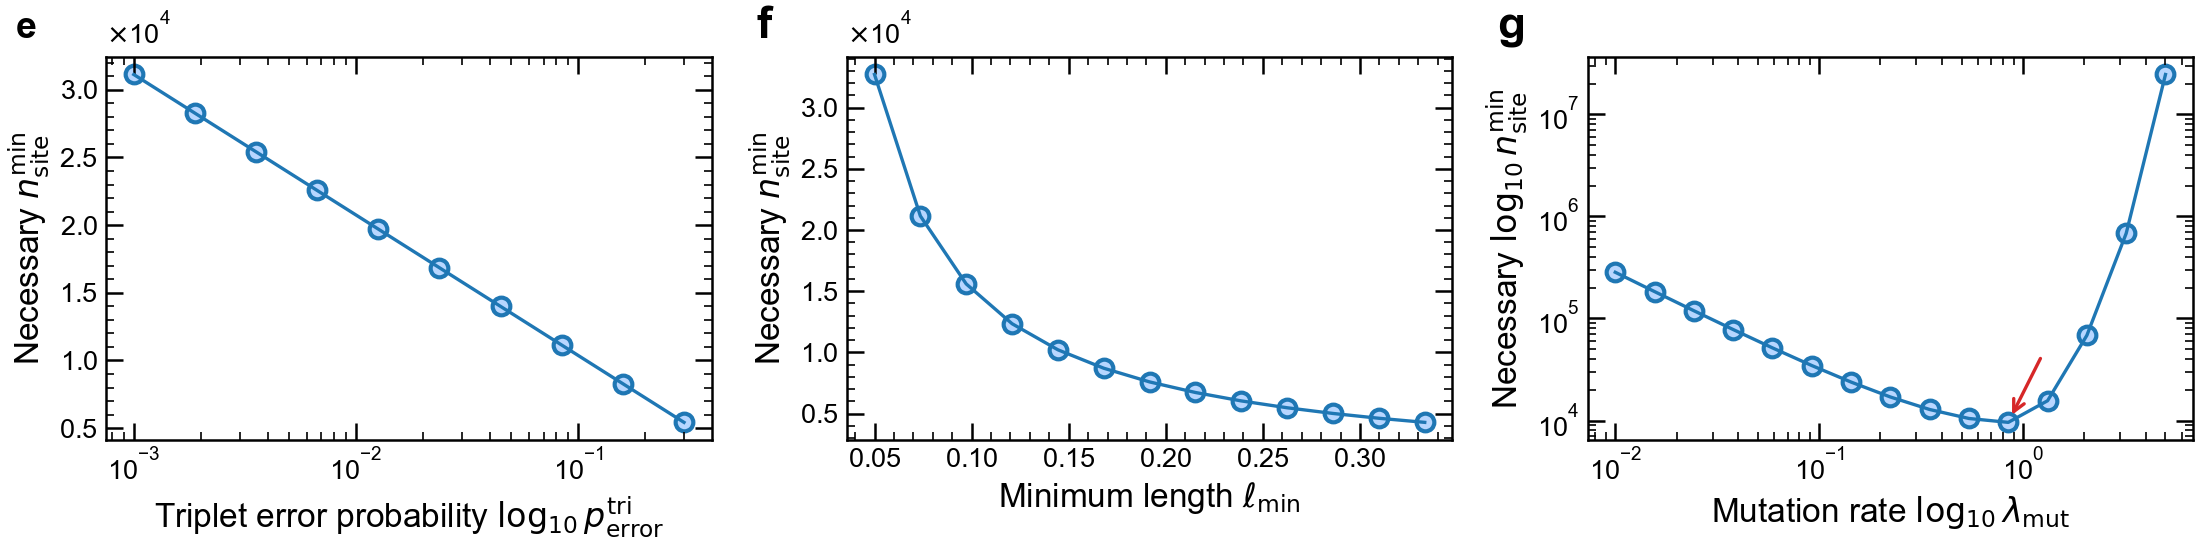

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from plot_style import configure_journal_style

configure_journal_style()

# =========================================================
# Colors
# =========================================================
colors = {
    'blue': '#1f77b4',
    'red': '#d62728',
}

# =========================================================
# delta* function
# =========================================================
def solve_delta_star(d, lam, q):
    return 0.6 * (
        np.exp(-lam * d) * (1 - q)
        + q * np.exp(-lam * (2 - d))
    )


def compute_delta_star(lam, q, d_max):
    """Compute optimal delta* by minimizing over d ∈ [0, d_max]."""
    res = minimize_scalar(
        solve_delta_star,
        bounds=(0, d_max),
        method="bounded",
        args=(lam, q)
    )
    return res.fun


def sample_complexity_bound(
    error, q, l_star, lam, delta_star, p_miss=0.0
):
    """
    Compute minimal required number of sites n_site^min
    as max(k1, k2).
    """
    log_term = -32 * np.log(error)

    k1 = log_term * q / (l_star**2 * delta_star**2 * (1 - p_miss)**5)

    k2 = log_term * (l_star + q * (1 - np.exp(-lam))) / (
        0.6 * lam * l_star**2 * delta_star
        * (1 - q + q * np.exp(-2 * lam))
        * (1 - p_miss)**3
    )

    return max(k1, k2)


# =========================================================
# Fixed parameters
# =========================================================
error = 0.05
q0 = 0.04
p_miss = 0.05
l_star0 = 1 / 9
d0 = 1
lambda0 = 0.25

# Precompute delta*
delta_star_0 = compute_delta_star(lambda0, q0, d0)

# =========================================================
# (c) error dependence
# =========================================================
error_values = np.logspace(np.log10(0.001), np.log10(0.3), 10)
k_values_error = np.array([
    sample_complexity_bound(
        err, q0, l_star0, lambda0, delta_star_0
    )
    for err in error_values
])

# =========================================================
# (d) l_min dependence
# =========================================================
l_star_values = np.linspace(1 / 20, 1 / 3, 13)
k_values_l_star = np.array([
    sample_complexity_bound(
        error, q0, l_star, lambda0, delta_star_0
    )
    for l_star in l_star_values
])

# =========================================================
# (e) lambda dependence
# =========================================================
lambda_values = np.logspace(-2, np.log10(5), 15)
k_values_lambda = []

for lam in lambda_values:
    delta_star = compute_delta_star(lam, q0, d0)
    k_values_lambda.append(
        sample_complexity_bound(
            error, q0, l_star0, lam, delta_star, p_miss
        )
    )

k_values_lambda = np.array(k_values_lambda)

# Minimum point
idx_min = np.argmin(k_values_lambda)
lambda_min = lambda_values[idx_min]
k_min = k_values_lambda[idx_min]

# =========================================================
# Plot: 1 × 3 panels
# =========================================================
fig, (axC, axD, axE) = plt.subplots(
    1, 3, figsize=(7.5, 2.0), dpi=300
)

# ---------------- (c) error ----------------
axC.plot(error_values, k_values_error, lw=0.8, color=colors["blue"])
axC.scatter(error_values, k_values_error, s=18,
            facecolors=(0.3, 0.6, 1.0, 0.4),
            edgecolors=colors["blue"])
axC.set_xscale("log")
axC.set_xlabel(r"Triplet error probability $\log_{10}p_{\mathrm{error}}^{\mathrm{tri}}$", fontsize=8)
axC.set_ylabel(r"Necessary $n_{\mathrm{site}}^{\mathrm{min}}$", fontsize=8)
axC.text(-0.15, 1.05, "e", transform=axC.transAxes,
         fontsize=11, fontweight="bold")

# ---------------- (d) l_min ----------------
axD.plot(l_star_values, k_values_l_star, lw=0.8, color=colors["blue"])
axD.scatter(l_star_values, k_values_l_star, s=18,
            facecolors=(0.3, 0.6, 1.0, 0.4),
            edgecolors=colors["blue"])
axD.set_xlabel(r"Minimum length $\ell_{\min}$", fontsize=8)
axD.set_ylabel(r"Necessary $n_{\mathrm{site}}^{\mathrm{min}}$", fontsize=8)
axD.text(-0.15, 1.05, "f", transform=axD.transAxes,
         fontsize=11, fontweight="bold")

# ---------------- (e) lambda ----------------
axE.plot(lambda_values, k_values_lambda, lw=0.8, color=colors["blue"])
axE.scatter(lambda_values, k_values_lambda, s=18,
            facecolors=(0.3, 0.6, 1.0, 0.4),
            edgecolors=colors["blue"])
axE.set_xscale("log")
axE.set_yscale("log")

axE.annotate(
    "",
    xy=(lambda_min, k_min),
    xytext=(lambda_min * 1.5, k_min * 5),
    arrowprops=dict(arrowstyle="->", lw=0.8, color=colors["red"])
)

axE.set_xlabel(r"Mutation rate $\log_{10}\lambda_{\mathrm{mut}}$", fontsize=8)
axE.set_ylabel(r"Necessary $\log_{10}n_{\mathrm{site}}^{\mathrm{min}}$", fontsize=8)
axE.text(-0.15, 1.05, "g", transform=axE.transAxes,
         fontsize=11, fontweight="bold")

plt.tight_layout()
plt.savefig("Fig_combined_cde.pdf", dpi=300, bbox_inches="tight")
plt.show()


# Sample Complexity vs. Noise and Tree Parameters

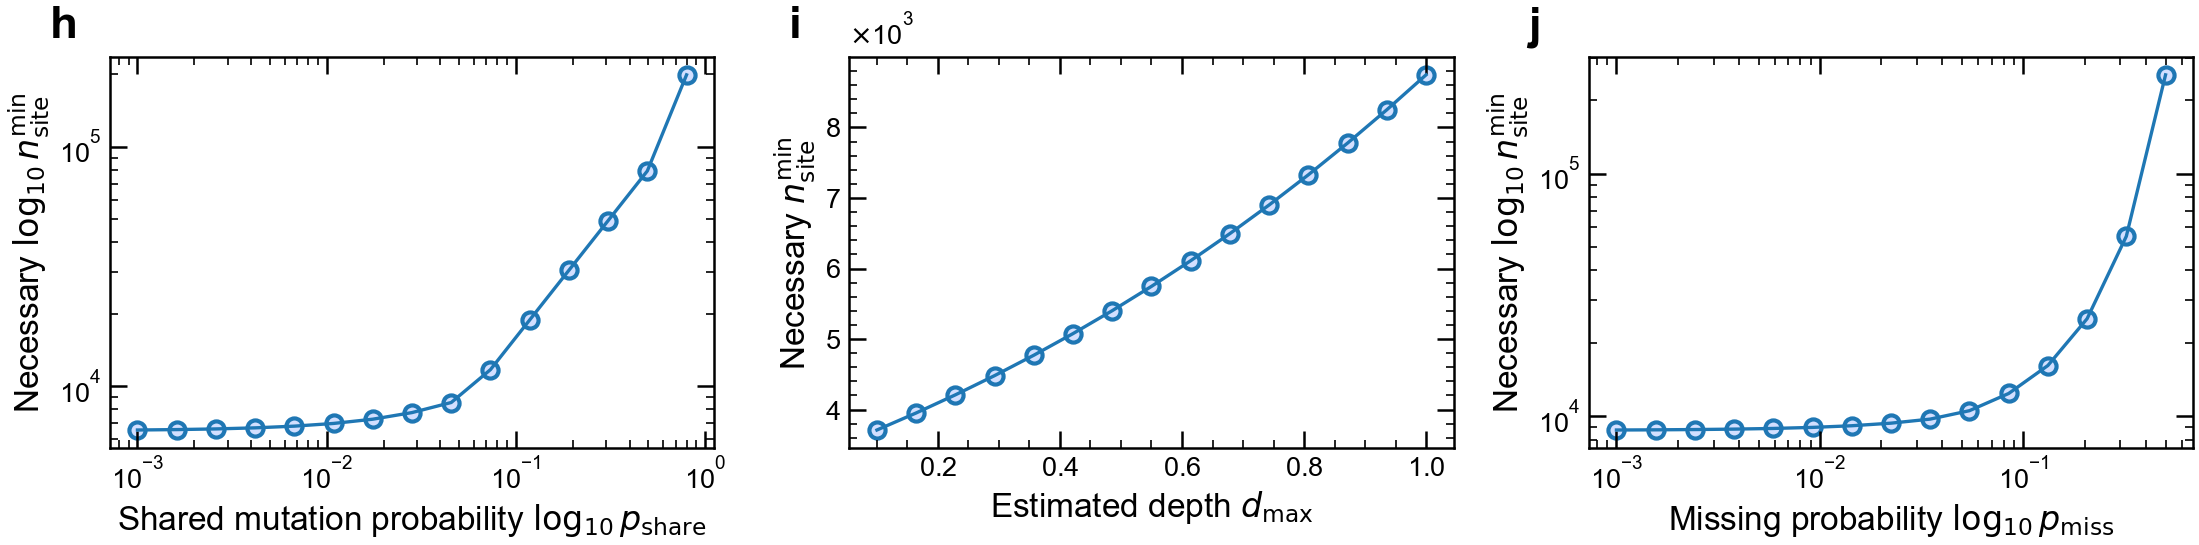

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from plot_style import configure_journal_style

configure_journal_style()

# =========================================================
# Colors
# =========================================================
colors = {
    'blue': '#1f77b4',
    'red': '#d62728',
}

# =========================================================
# delta* definition
# =========================================================
def solve_delta_star(d, lam, q):
    return 0.6 * (
        np.exp(-lam * d) * (1 - q)
        + q * np.exp(-lam * (2 - d))
    )


def compute_delta_star(lam, q, d_max):
    """Compute optimal delta* by minimizing over d ∈ [0, d_max]."""
    res = minimize_scalar(
        solve_delta_star,
        bounds=(0, d_max),
        method="bounded",
        args=(lam, q)
    )
    return res.fun


def sample_complexity_bound(
    error, q, l_star, lam, delta_star, p_miss=0.0
):
    """
    Compute the minimal required number of mutation sites:
        n_site^min = max(k1, k2)
    """
    log_term = -32 * np.log(error)

    k1 = log_term * q / (
        l_star**2 * delta_star**2 * (1 - p_miss)**5
    )

    k2 = log_term * (l_star + (1 - np.exp(-lam)) * q) / (
        0.6 * lam * l_star**2 * delta_star
        * (1 - q + q * np.exp(-2 * lam))
        * (1 - p_miss)**3
    )

    return max(k1, k2)


# =========================================================
# Fixed parameters
# =========================================================
error = 0.05
q0 = 0.05
l_star0 = 1 / 9
d0 = 1
lambda0 = 1

# =========================================================
# Parameter grids
# =========================================================
q_values = np.logspace(np.log10(0.001), np.log10(0.8), 15)
d_values = np.linspace(0.1, 1, 15)
p_miss_values = np.logspace(np.log10(0.001), np.log10(0.5), 15)

# =========================================================
# k(q)
# =========================================================
k_values_q = np.array([
    sample_complexity_bound(
        error,
        q,
        l_star0,
        lambda0,
        compute_delta_star(lambda0, q, d0)
    )
    for q in q_values
])

# =========================================================
# k(d)
# =========================================================
delta_star_d = compute_delta_star(lambda0, q0, d0)
k_values_d = np.array([
    sample_complexity_bound(
        error,
        q0,
        l_star0,
        lambda0,
        compute_delta_star(lambda0, q0, d)
    )
    for d in d_values
])

# =========================================================
# k(p_miss)
# =========================================================
delta_star_0 = compute_delta_star(lambda0, q0, d0)
k_values_p_miss = np.array([
    sample_complexity_bound(
        error,
        q0,
        l_star0,
        lambda0,
        delta_star_0,
        p_miss
    )
    for p_miss in p_miss_values
])

# =========================================================
# Plot: f, g, h panels
# =========================================================
fig, (axf, axg, axh) = plt.subplots(1, 3, figsize=(7.5, 2), dpi=300)

# -------- (f) q --------
axf.plot(q_values, k_values_q, lw=0.8, color=colors["blue"])
axf.scatter(q_values, k_values_q, s=15,
            facecolors=(0.3, 0.5, 1.0, 0.25),
            edgecolors=colors["blue"])
axf.set_xscale("log")
axf.set_yscale("log")
axf.set_xlabel(r"Shared mutation probability $\log_{10}p_{\mathrm{share}}$", fontsize=8)
axf.set_ylabel(r"Necessary $\log_{10}n_{\mathrm{site}}^{\min}$", fontsize=8)
axf.text(-0.1, 1.05, "h", transform=axf.transAxes,
         fontsize=11, fontweight="bold")

# -------- (g) d --------
axg.plot(d_values, k_values_d, lw=0.8, color=colors["blue"])
axg.scatter(d_values, k_values_d, s=15,
            facecolors=(0.3, 0.5, 1.0, 0.25),
            edgecolors=colors["blue"])
axg.set_xlabel(r"Estimated depth $d_{\max}$", fontsize=8)
axg.set_ylabel(r"Necessary $n_{\mathrm{site}}^{\min}$", fontsize=8)
axg.text(-0.1, 1.05, "i", transform=axg.transAxes,
         fontsize=11, fontweight="bold")

# -------- (h) p_miss --------
axh.plot(p_miss_values, k_values_p_miss, lw=0.8, color=colors["blue"])
axh.scatter(p_miss_values, k_values_p_miss, s=15,
            facecolors=(0.3, 0.5, 1.0, 0.25),
            edgecolors=colors["blue"])
axh.set_xscale("log")
axh.set_yscale("log")
axh.set_xlabel(r"Missing probability $\log_{10}p_{\mathrm{miss}}$", fontsize=8)
axh.set_ylabel(r"Necessary $\log_{10}n_{\mathrm{site}}^{\min}$", fontsize=8)
axh.text(-0.1, 1.05, "j", transform=axh.transAxes,
         fontsize=11, fontweight="bold")

plt.tight_layout()
plt.savefig("Fig_combined_fgh_loglog.pdf", dpi=300, bbox_inches="tight")
plt.show()
